# Lesson 2
## Gridded Data

### The tools of the trade

Some of the most common tools used in modifying numerical data in grids (or arrays) are NumPy and Pandas. NumPy has many extensions that are helpful in the weather domain such as SciPy.

### NumPy 

If you're a visual learner, there is a wonderful tutorial here: [NumPy Illustrated](https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d). 1-D arrays are simple enough to understand, and even 2-D arrays make a lot of sense to anyone who has spent a decent amount of time dealing with images or maps of some kind. Weather data can start to make things complex, however, by adding 3rd, 4th, 5th and sometimes even more dimensions to our data. NumPy (when used properly) can help alleviate us from having to think too hard about how to apply equations to these datasets, but you must understand how to use it properly.

In this section we'll explore some basic NumPy functionality and use Pandas to visualize what we're doing.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# make a simple 1-d array of data

one_d_array = np.array([ x + 10 for x in (0, 1, 2, 3, 4, 5)]) # this is a row.  Pandas might see it as a column.

In [8]:
one_d_array

array([10, 11, 12, 13, 14, 15])

In [9]:
pd.DataFrame(one_d_array) # See how pandas thinks its a column...

,0
0,10
1,11
2,12
3,13
4,14
5,15


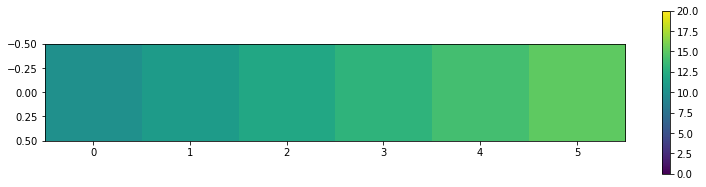

In [11]:
# Now we'll render a raster of the data with matplotlib, but in order to do this we must add a 2nd dimension 
# so we warp the array inside another array
fig, ax = plt.subplots(figsize=(13, 3))

pos = plt.imshow([one_d_array], vmin=0, vmax=20)  # One row wrapped in [ ] makes it 2-D
# The vmin/vmax control the color gradient.  Frequently we want to specify to avoid outliers from messing things up.
fig.colorbar(pos)

In [12]:
one_d_array -= 10

In [13]:
def plot_grid(data):
    fig, ax = plt.subplots(figsize=(18, 10))

    pos = plt.imshow(data)
    fig.colorbar(pos)

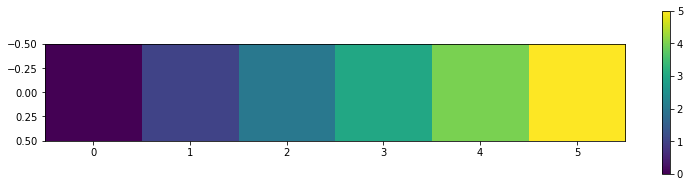

In [14]:
# Now we'll render a raster of the data with matplotlib, but in order to do this we must add a 2nd dimension 
# so we warp the array inside another array
fig, ax = plt.subplots(figsize=(13, 3))

pos = plt.imshow([one_d_array])
fig.colorbar(pos)

In [15]:
# We can also apply more advanced logic to our array
# Let's multiply two arrays together

another_array = np.array((21, 24, 25, 26, 28, 22))

another_array

array([21, 24, 25, 26, 28, 22])

In [16]:
one_d_array * another_array

array([  0,  24,  50,  78, 112, 110])

In [28]:
one_d_array[[0,2]]

array([0, 2])

In [17]:
# Now we'll load some real weather data into an array and play with some more advanced features
with open("../sample_array.np", "rb") as f:
    temperature_data = np.fromfile(f)

In [20]:
temperature_data

array([272.94150391, 272.94150391, 272.94150391, ..., 220.74150391,
       220.74150391, 220.74150391])

In [21]:
len(temperature_data)

1038240

TypeError: Invalid shape (1038240,) for image data

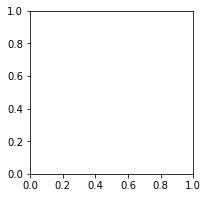

In [30]:
# now let's visualize it
fig, ax = plt.subplots(figsize=(13, 3))

pos = plt.imshow(temperature_data)
fig.colorbar(pos)

In [31]:
# whoops! This data is 1-D still
print(temperature_data.shape)
temperature_data = temperature_data.reshape((721, 1440))
print(temperature_data.shape)

(1038240,)
(721, 1440)


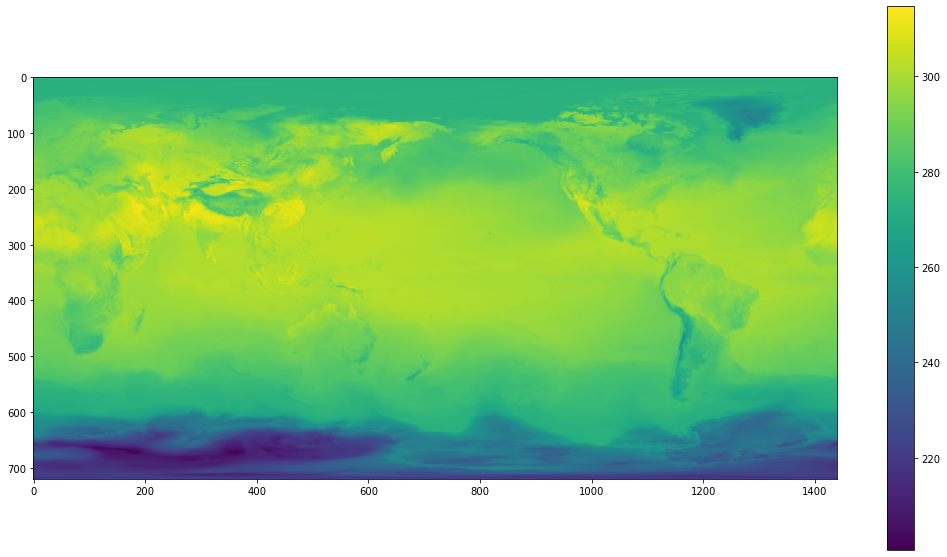

In [32]:
# now let's visualize it
fig, ax = plt.subplots(figsize=(18, 10))

pos = plt.imshow(temperature_data)
fig.colorbar(pos)

In [33]:
# The data is loaded in Kelvin, so let's convert it to celsius

temperature_data -= 273.15

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


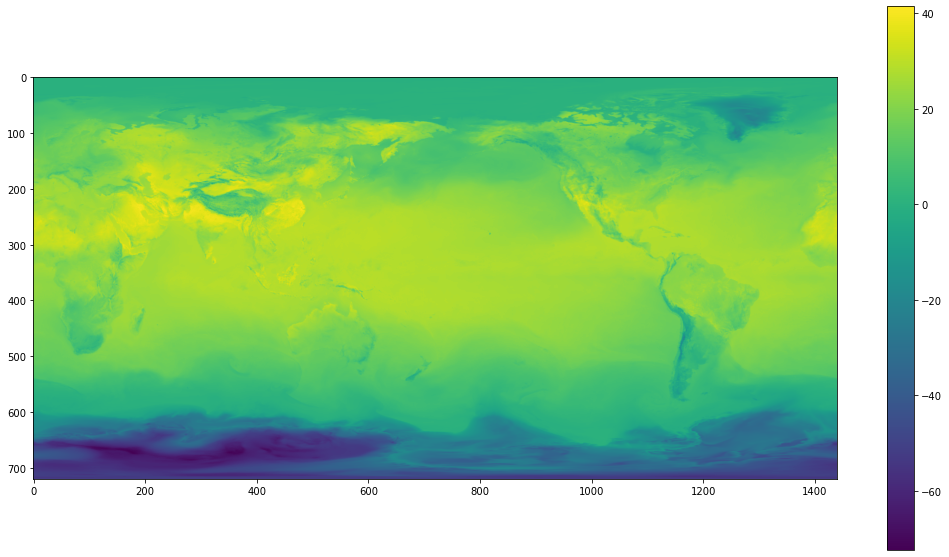

In [34]:
%time
plot_grid(temperature_data)

In [35]:
# what if we wanted to apply an equation to only specific data?
# let's look at numpy's "where" feature

sample_array = np.array([[1, 2, 3, 4], [2, 3, 4, 5]])
np.where(sample_array > 3)

(array([0, 1, 1]), array([3, 2, 3]))

In [36]:
# numpy.where returns the indexes of all locations in your array where your equation evaluates to true
# this can be fed in to access those specifc points in an array

sample_array[0, 1]

2

In [37]:
# you can also access multiple points in the array
sample_array[[0,0], [1,2]]

array([2, 3])

In [38]:
# let's get every value that is greater than 3 now
sample_array[np.where(sample_array > 3)]

array([4, 4, 5])

In [39]:
# now let's use this to replace all values larger than 3 with a 0
sample_array[np.where(sample_array > 3)] = 0
sample_array

array([[1, 2, 3, 0],
       [2, 3, 0, 0]])

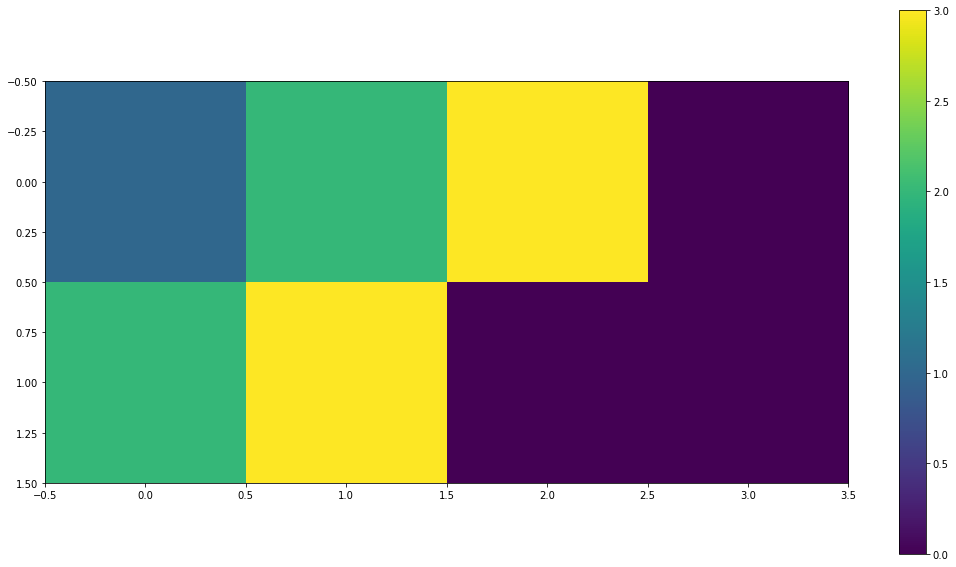

In [40]:
# we can also mask out the data
# masked arrays allow you to run advanced calculations and ignore masked values saving computing time
# or excluding those values from a render

plot_grid(sample_array)

In [41]:
sample_masked = np.ma.masked_where(sample_array == 0, sample_array)
sample_masked

masked_array(
  data=[[1, 2, 3, --],
        [2, 3, --, --]],
  mask=[[False, False, False,  True],
        [False, False,  True,  True]],
  fill_value=999999)

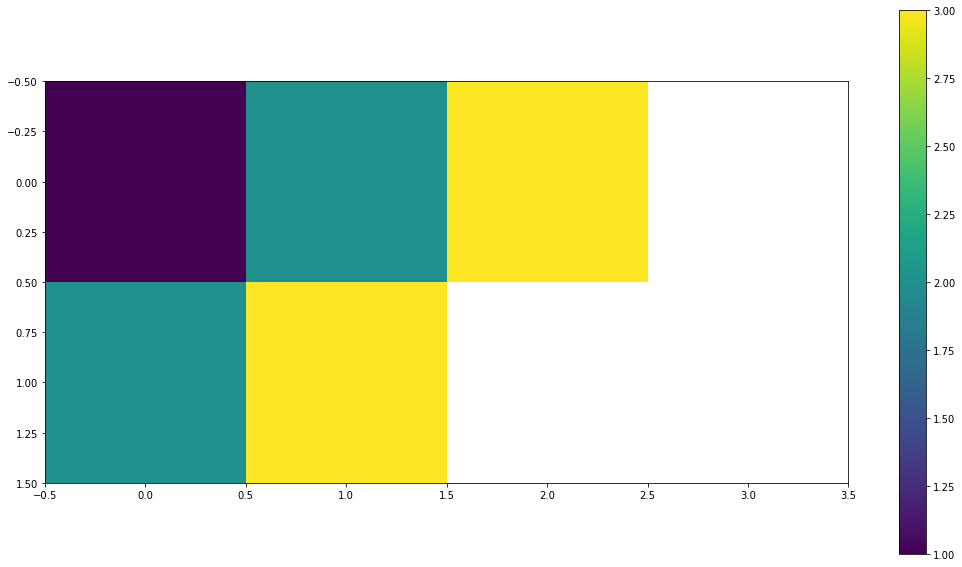

In [42]:
# the results of a mask will come back in two parts, the data itself, and a boolean mask array
# most numpy and scipy functions will automatically parse these pieces of information to optimize

# when rendered, masked values will just be missing/tranpsarent
plot_grid(sample_masked)

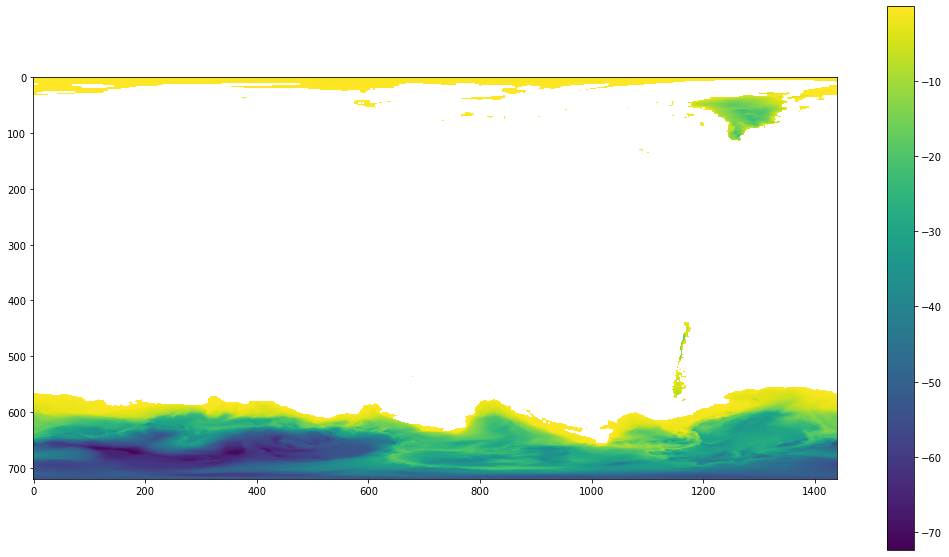

In [43]:
# next we'll apply this logic to our temperature arrray and mask out anywhere the temperature is above freezing
temperature_masked = np.ma.masked_where(temperature_data > 0, temperature_data)
plot_grid(temperature_masked)